In [7]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

In [8]:
# Set your dataset path and emotions list
dataset_path = '/Users/bahij/Desktop/Multimodal Emotion Recognition/datasets/test'
emotions = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

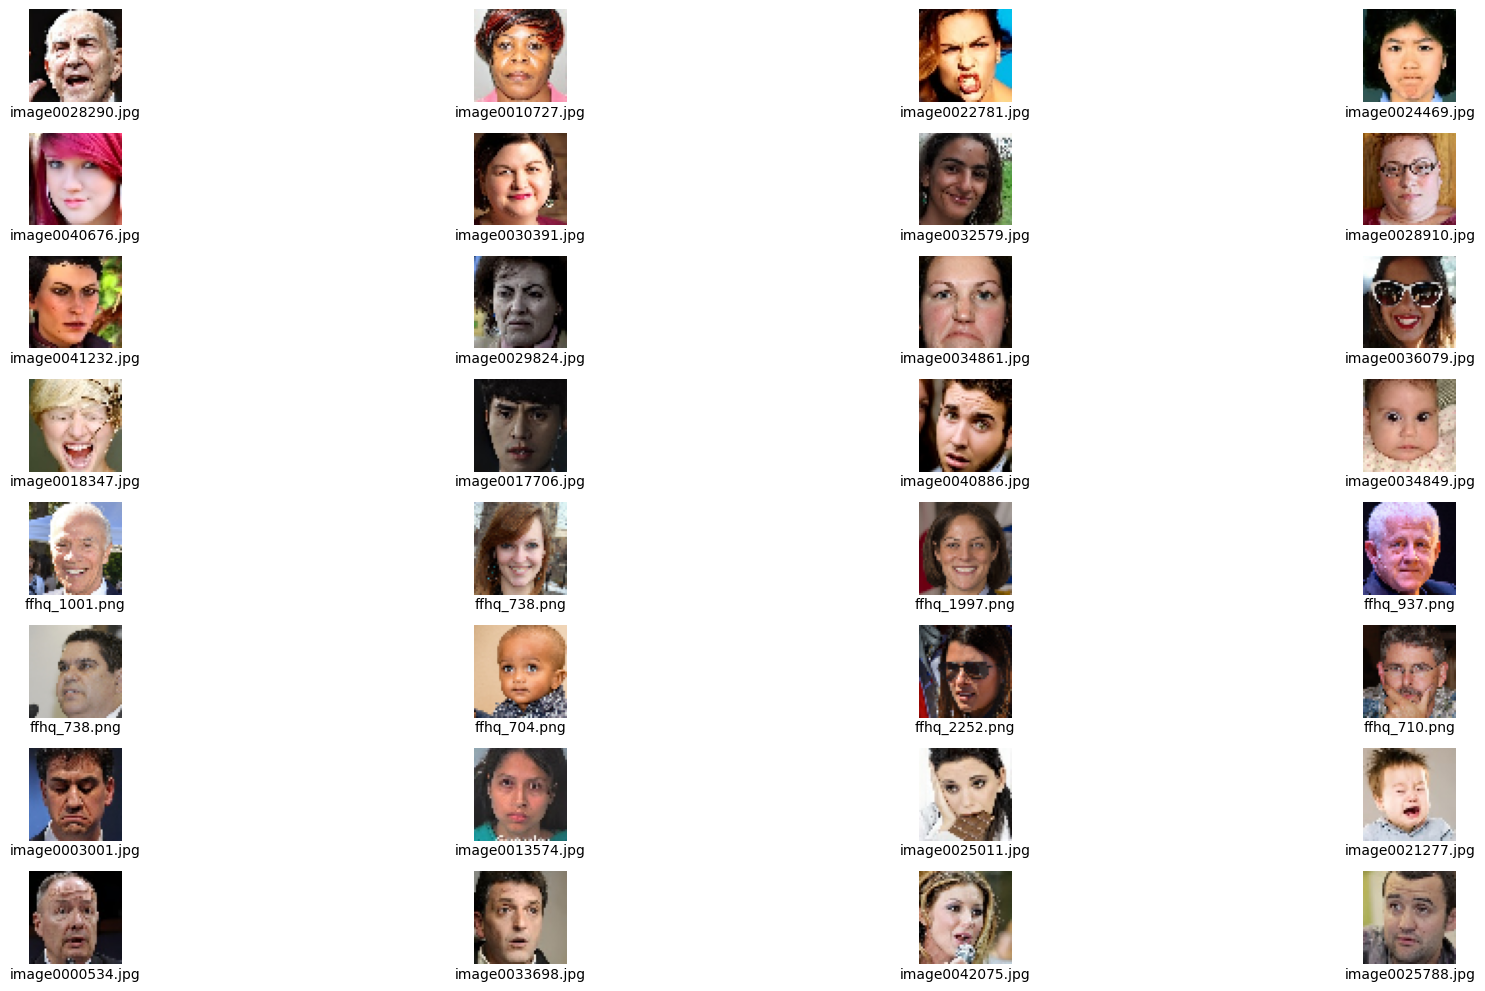

In [9]:
fig, axes = plt.subplots(nrows=len(emotions), ncols=4, figsize=(20, 10))
for i, emotion in enumerate(emotions):
    emotion_dir = os.path.join(dataset_path, emotion)
    emotion_images = os.listdir(emotion_dir)[:4]

    for j, img_name in enumerate(emotion_images):
        # Skip hidden files like .DS_Store
        if img_name.startswith('.'):
            continue

        img_path = os.path.join(emotion_dir, img_name)
        img = load_img(img_path, target_size=(48, 48))
        ax = axes[i, j]  # Make sure you use two indexes for 2D axes
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        
        # Display filename as text
        ax.text(0.5, -0.15, img_name, size=10, ha='center', transform=ax.transAxes)

        if j == 0:
            ax.set_ylabel(emotion, size='large')
            
# Make sure layout is tight to prevent overlapping
plt.tight_layout()
# Display the figure
plt.show()            

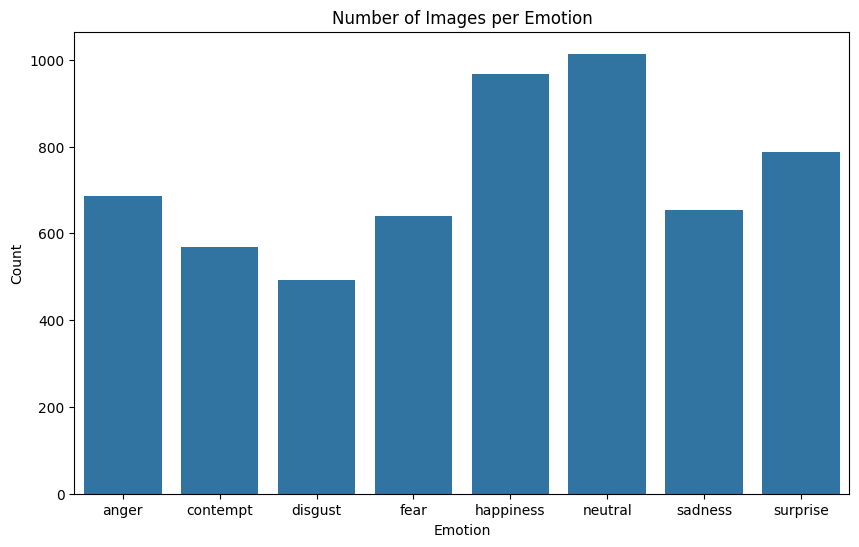

In [10]:
import seaborn as sns

# Assuming 'emotions' is a list of class names and 'dataset_path' is defined
class_counts = {emotion: len(os.listdir(os.path.join(dataset_path, emotion)))
                for emotion in emotions}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title('Number of Images per Emotion')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

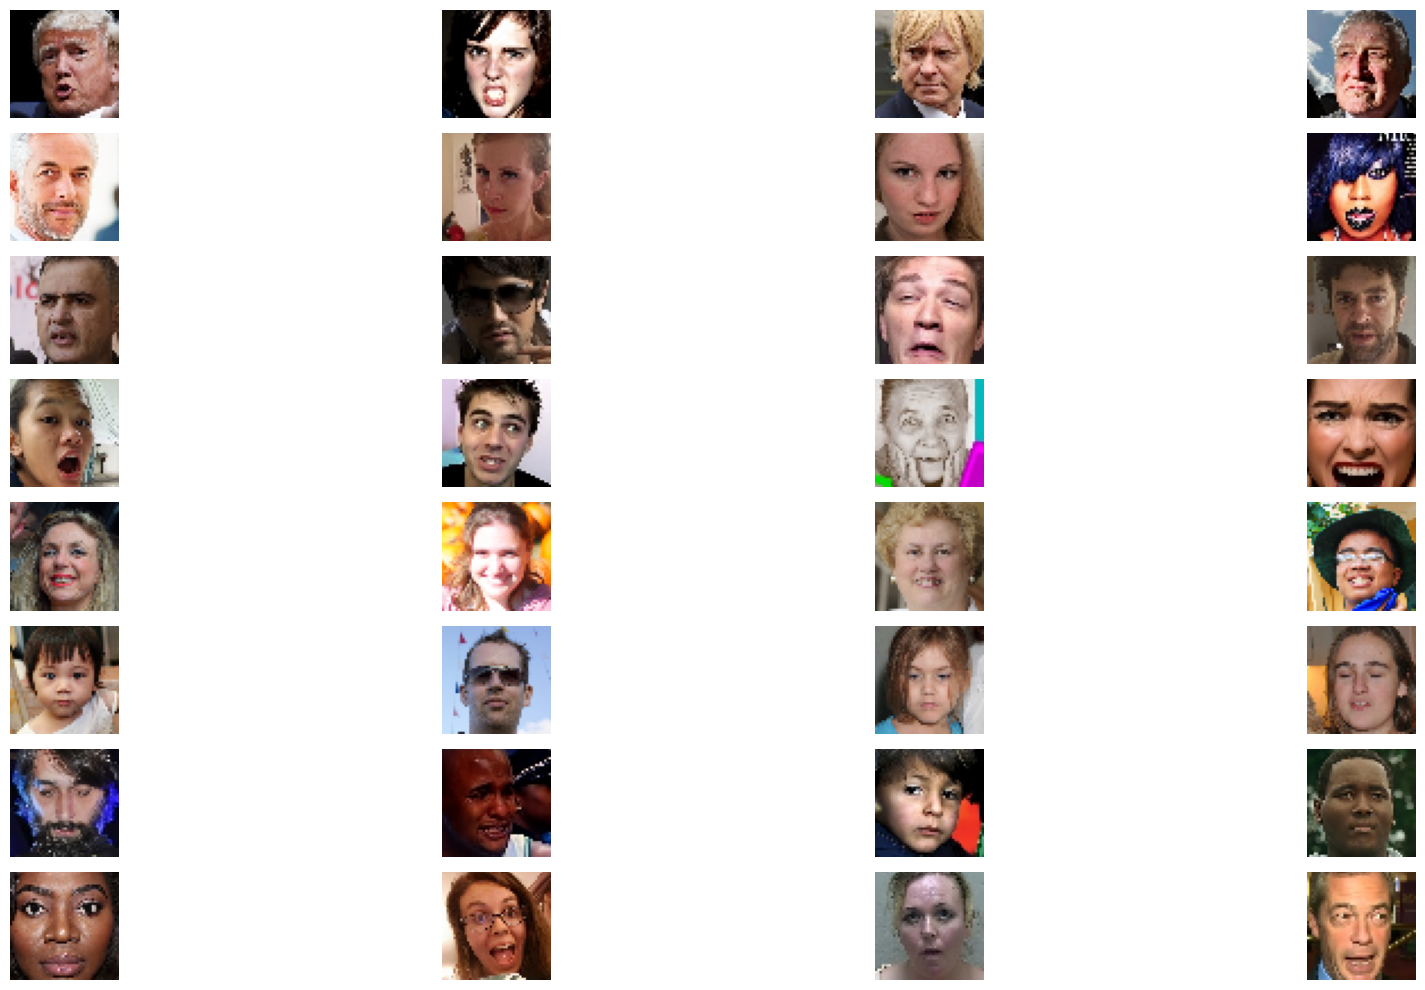

In [11]:
import random

# Display a random sample of images from each category
fig, axes = plt.subplots(nrows=len(emotions), ncols=4, figsize=(20, 10))

for i, emotion in enumerate(emotions):
    emotion_dir = os.path.join(dataset_path, emotion)
    emotion_images = random.sample(os.listdir(emotion_dir), 4)

    for j, img_name in enumerate(emotion_images):
        img_path = os.path.join(emotion_dir, img_name)
        img = load_img(img_path, target_size=(48, 48))
        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_ylabel(emotion, size='large')

plt.tight_layout()
plt.show()

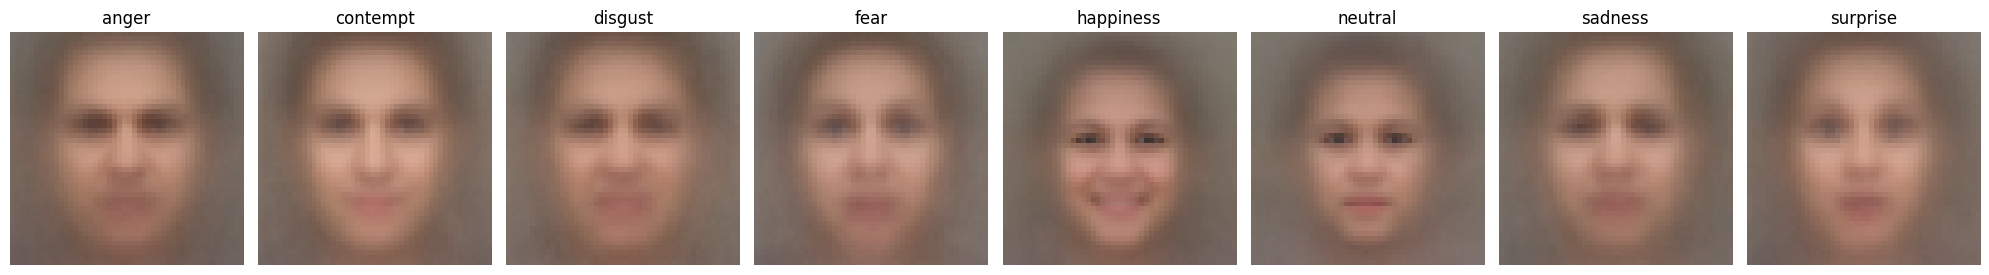

In [12]:
import numpy as np

# Compute the average face for each emotion
fig, axes = plt.subplots(1, len(emotions), figsize=(20, 5))

for i, emotion in enumerate(emotions):
    emotion_dir = os.path.join(dataset_path, emotion)
    images = [np.array(load_img(os.path.join(emotion_dir, img), 
                    target_size=(48, 48))) / 255.0 
              for img in os.listdir(emotion_dir) if not img.startswith('.')]
    
    avg_image = np.mean(images, axis=0)
    axes[i].imshow(avg_image.squeeze(), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(emotion)

plt.tight_layout()
plt.show()